<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/l3v4_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from fastai import *
from fastai.vision import *

In [14]:
path = untar_data(URLs.PLANET_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/planet_sample/train'),
 PosixPath('/root/.fastai/data/planet_sample/labels.csv')]

In [15]:
csv = pd.read_csv(path/'labels.csv')
csv.head()

image_name                             tags
0  train_21983            partly_cloudy primary
1   train_9516  clear cultivation primary water
2  train_12664                     haze primary
3  train_36960                    clear primary
4   train_5302                haze primary road

In [16]:
len((path/'train').ls())

1001

In [17]:
(path/'train').ls()[:5]

[PosixPath('/root/.fastai/data/planet_sample/train/train_25324.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_37921.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_10712.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_5906.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_4881.jpg')]

In [18]:
src = ImageList.from_folder(path/'train').split_by_rand_pct()

In [19]:
src = ImageList.from_df(csv, path = path/'train', suffix= '.jpg').split_by_rand_pct().label_from_df(cols = 'tags', label_delim = ' ')

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [20]:
img = open_image((path/'train').ls()[0])

In [21]:
img.data.shape

torch.Size([3, 256, 256])

In [22]:
data = src.transform(get_transforms(), size = 128).databunch(bs = 32).normalize(imagenet_stats)

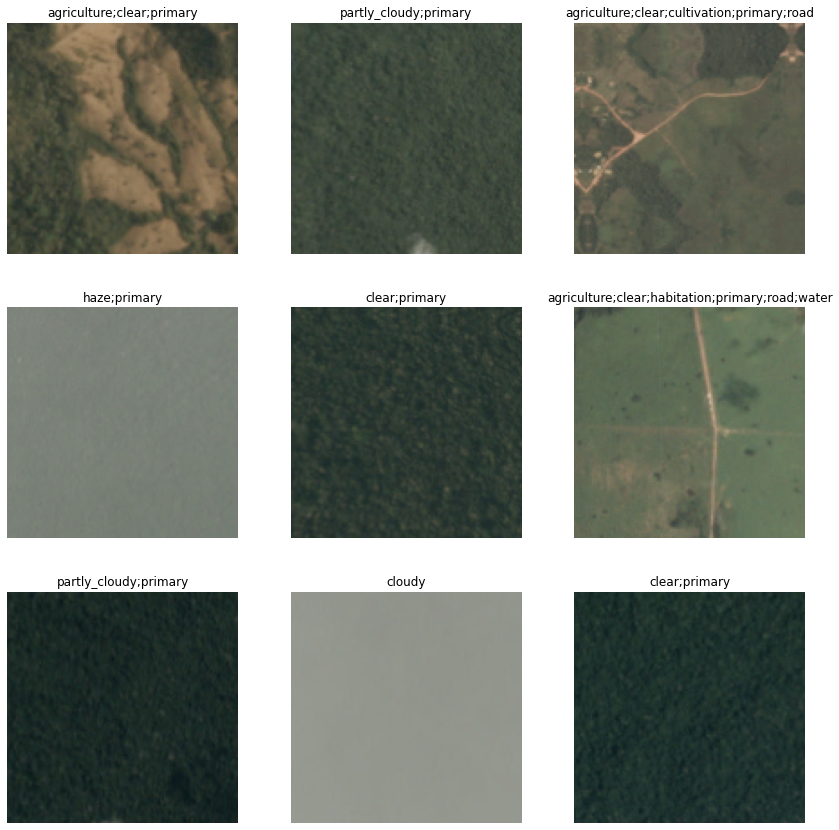

In [23]:
data.show_batch(rows = 3)

In [24]:
##start the model part here

learn = cnn_learner(data, models.resnet18, metrics = accuracy)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


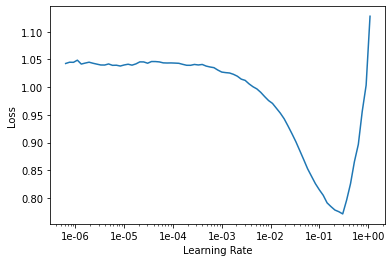

In [26]:
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(2, max_lr=slice(3e-02, 6e-02))

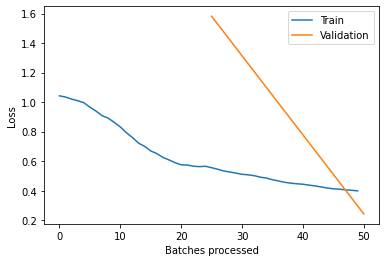

In [28]:
learn.recorder.plot_losses()

In [29]:
learn.unfreeze()

In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


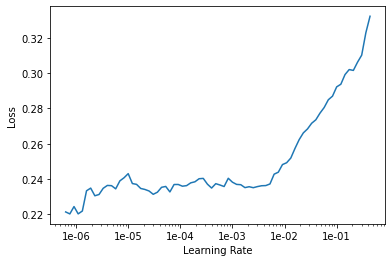

In [31]:
learn.recorder.plot()

In [32]:
learn.freeze()

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


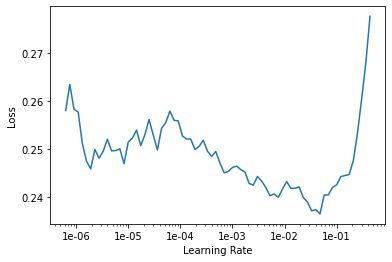

In [34]:
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(2, max_lr=slice(3e-02, 6e-02))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


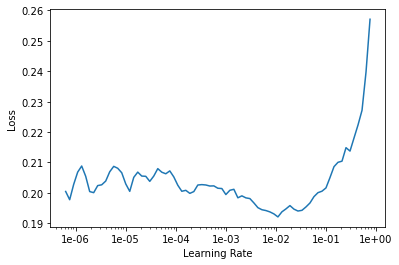

In [36]:
learn.lr_find()
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(2, 1e-03)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


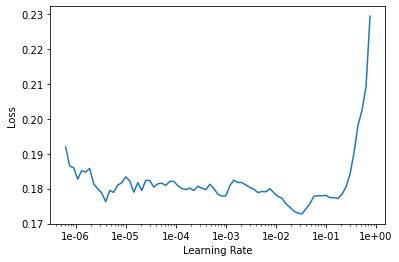

In [38]:
learn.lr_find()
learn.recorder.plot()

In [39]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


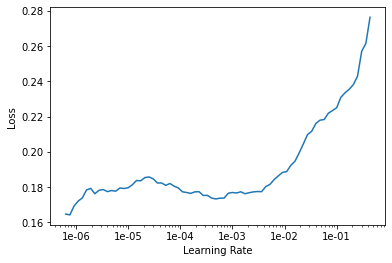

In [40]:
learn.recorder.plot()

In [41]:
learn.fit_one_cycle(5, 1e-04)

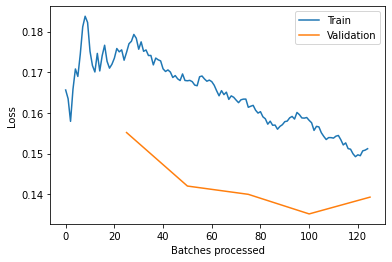

In [42]:
learn.recorder.plot_losses()

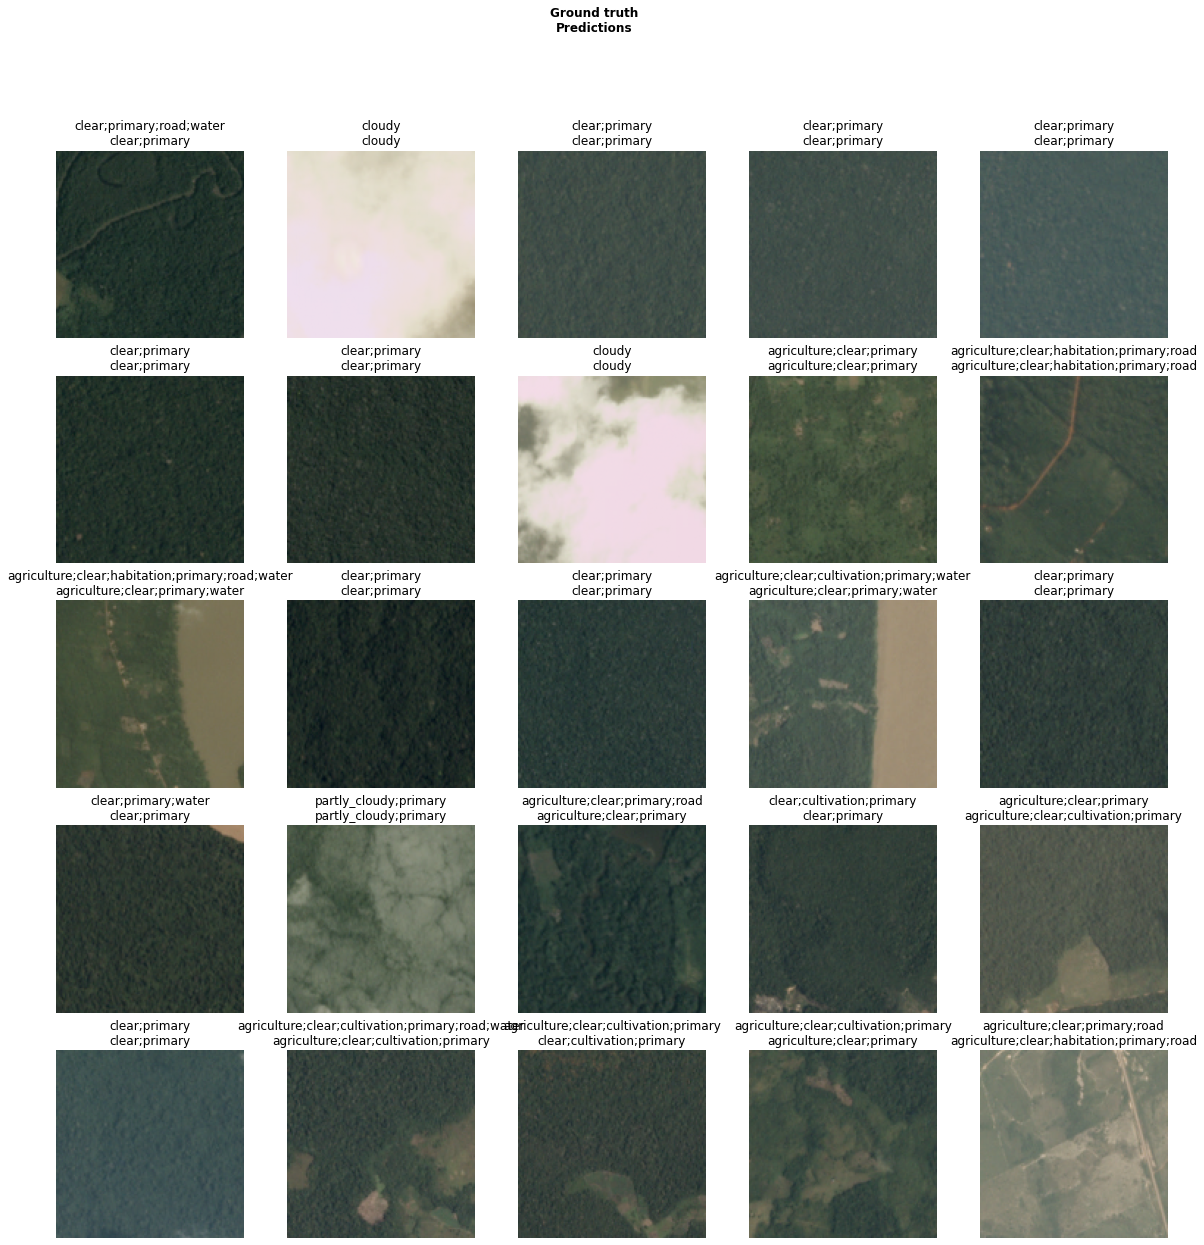

In [43]:
learn.show_results()

In [44]:
data_new = src.transform(get_transforms(flip_vert=True), size = 256).databunch(bs= 32).normalize(imagenet_stats)

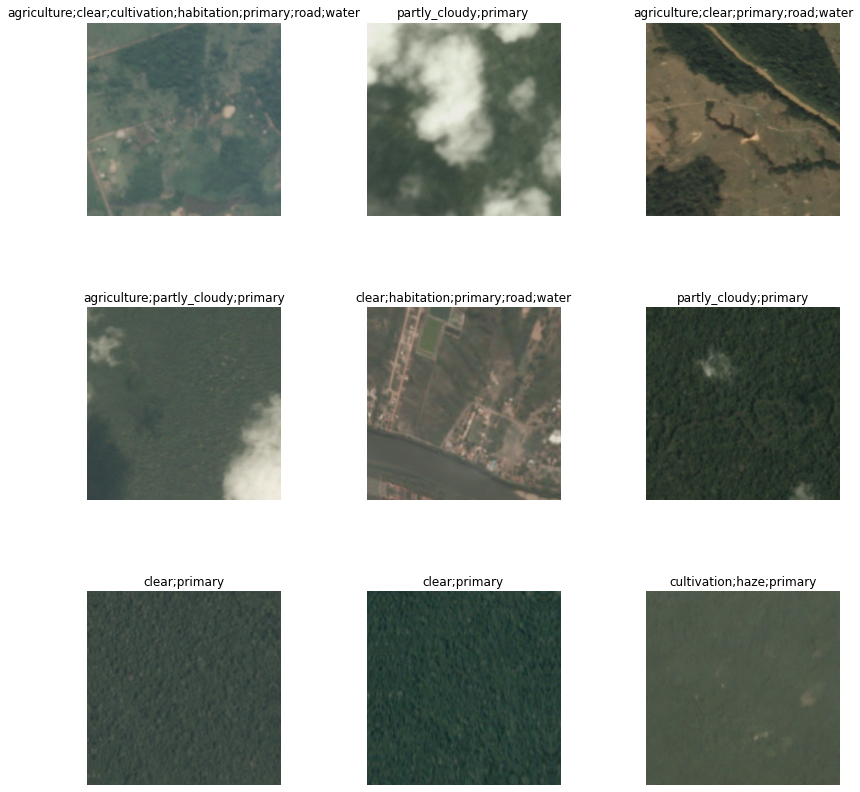

In [45]:
data_new.show_batch(rows = 3)

In [46]:
learn.save('step_1')

In [47]:
learn.data = data_new
learn.freeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


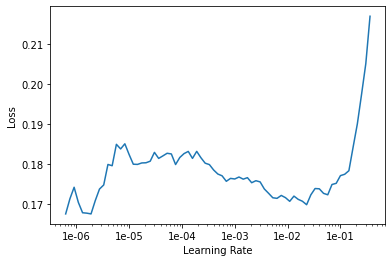

In [48]:
learn.recorder.plot()

In [49]:
learn.fit_one_cycle(3, slice(1e-03, 1e-02))

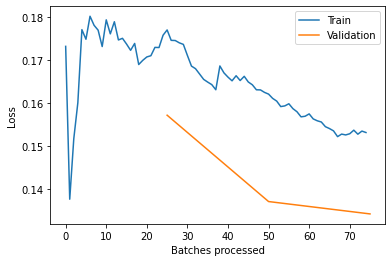

In [50]:
learn.recorder.plot_losses()

In [51]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


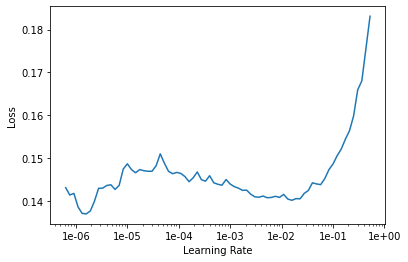

In [52]:
learn.recorder.plot()

In [53]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


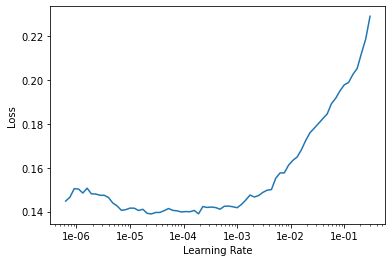

In [54]:
learn.lr_find()
learn.recorder.plot()

In [55]:
learn.fit_one_cycle(3, slice(1e-04))

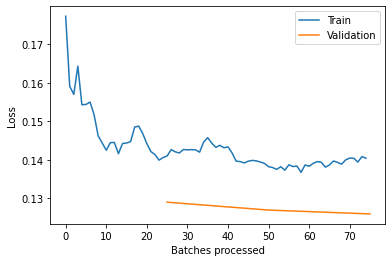

In [56]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


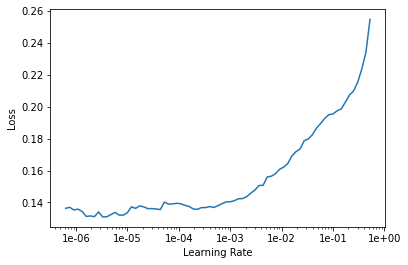

In [57]:
learn.lr_find()
learn.recorder.plot()

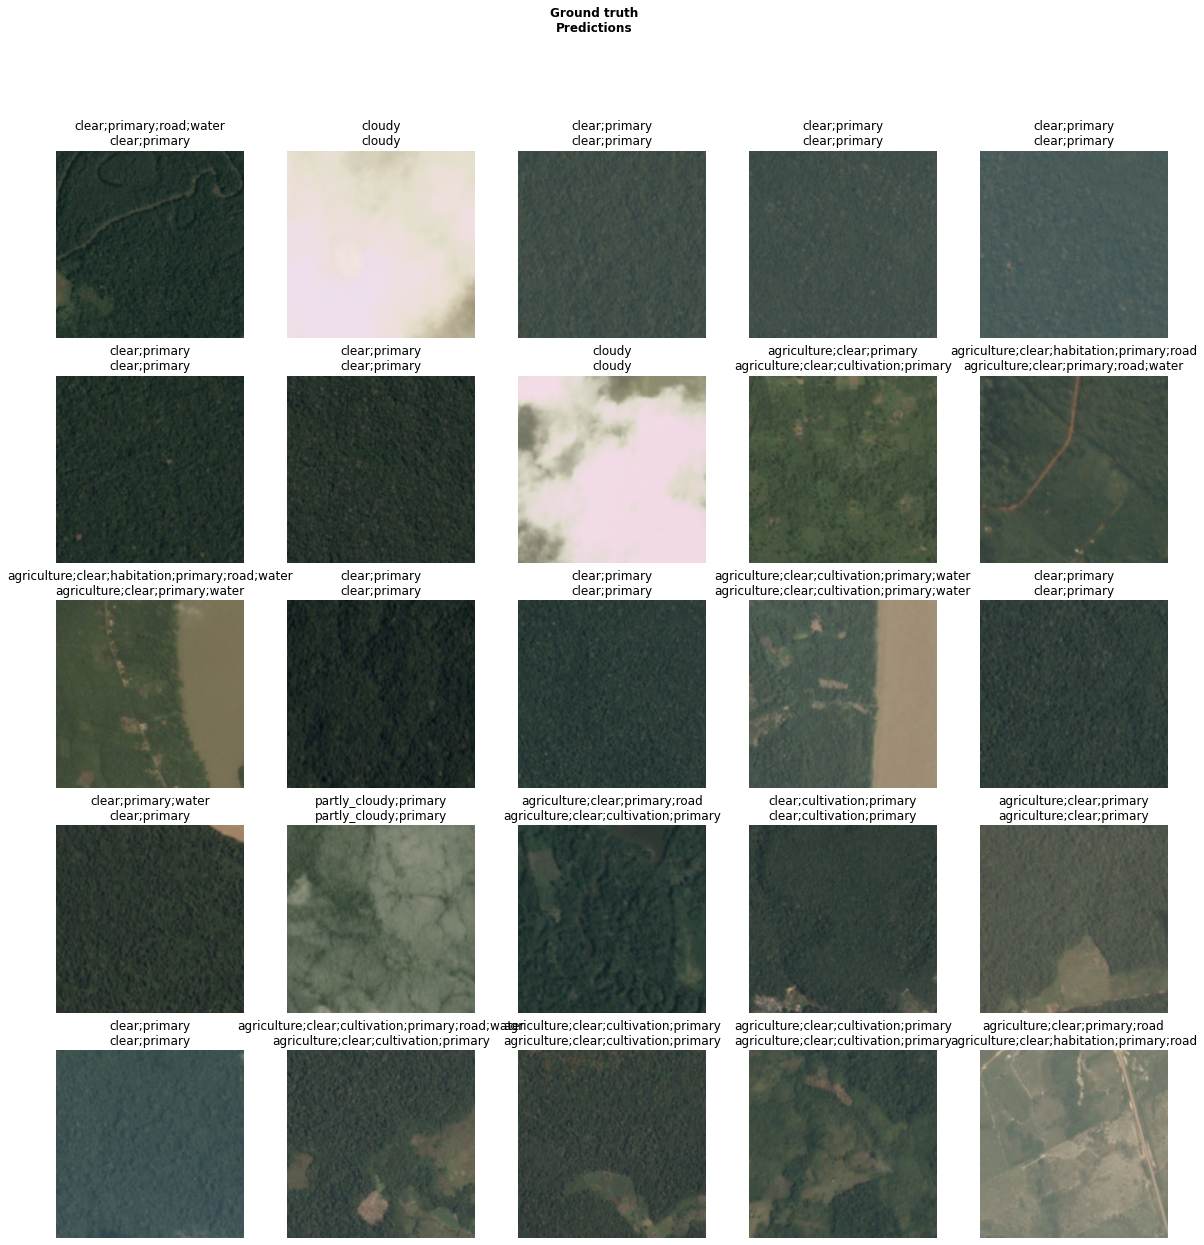

In [58]:
learn.show_results()